In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

INPUT_PATH = "../../data/processed/kinematic_equation_cleaned_dataset.csv"
OUTPUT_PATH = "../../data/processed/kinematic_equation_cleaned_dataset.csv"

if not os.path.exists(INPUT_PATH):
    raise FileNotFoundError(f"Processed dataset not found at: {INPUT_PATH}")

In [16]:
df = pd.read_csv(INPUT_PATH)
print(f"Loaded cleaned dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded cleaned dataset: 3000 rows × 3 columns


,Acceleration_ms2,Time_s,Displacement_m
0,7.803532,6.759760,178.288670
1,19.038929,7.987146,607.289463
2,14.773882,2.579632,49.156415
3,12.173840,6.286254,240.536730
4,3.542363,5.760285,58.769379


In [17]:
df["a_times_t2"] = df["Acceleration_ms2"] * df["Time_s"] ** 2

df["log_acceleration"] = np.log(df["Acceleration_ms2"])
df["log_time"] = np.log(df["Time_s"])
df["log_displacement"] = np.log(df["Displacement_m"])


In [18]:
correlation = df.corr(numeric_only=True)["Displacement_m"].sort_values(ascending=False)
print("Feature correlation with target (Displacement):\n", correlation)

Feature correlation with target (Displacement):
 Displacement_m      1.000000
a_times_t2          1.000000
Time_s              0.747318
log_displacement    0.739140
log_time            0.609732
Acceleration_ms2    0.471636
log_acceleration    0.438196
Name: Displacement_m, dtype: float64


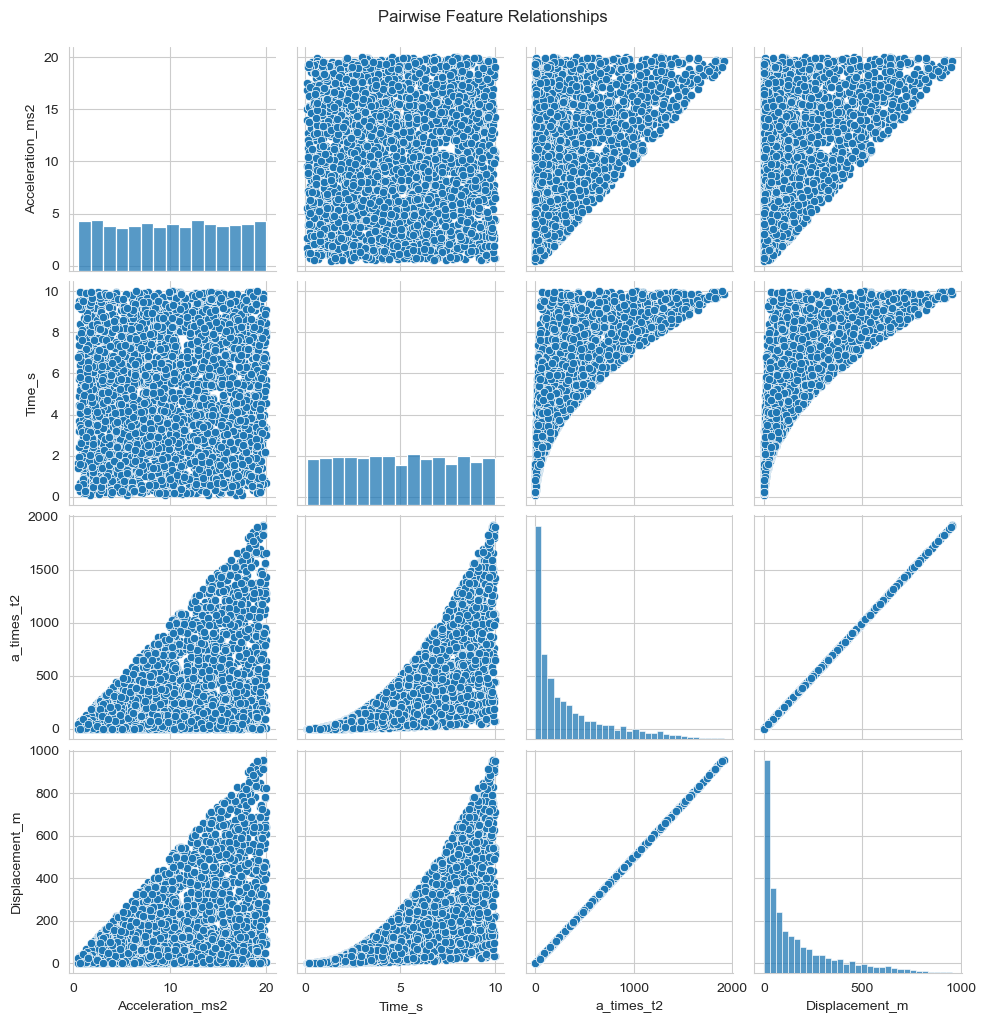

In [19]:
sns.pairplot(df[["Acceleration_ms2", "Time_s", "a_times_t2", "Displacement_m"]])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

In [20]:
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
df.to_csv(OUTPUT_PATH, index=False)
print(f"Feature-engineered dataset saved to: {OUTPUT_PATH}")

Feature-engineered dataset saved to: ../../data/processed/kinematic_equation_cleaned_dataset.csv
